In [1]:
library(caret)
library(pROC)
library(mlbench)
library(lattice)

Warning message:
"package 'caret' was built under R version 3.6.3"Loading required package: lattice
Warning message:
"package 'lattice' was built under R version 3.6.3"Loading required package: ggplot2
Registered S3 methods overwritten by 'ggplot2':
  method         from 
  [.quosures     rlang
  c.quosures     rlang
  print.quosures rlang
Warning message:
"package 'pROC' was built under R version 3.6.3"Type 'citation("pROC")' for a citation.

Attaching package: 'pROC'

The following objects are masked from 'package:stats':

    cov, smooth, var

Warning message:
"package 'mlbench' was built under R version 3.6.3"

In [2]:
zoo <- read.csv(file.choose())

In [3]:
str(zoo)

'data.frame':	101 obs. of  18 variables:
 $ animal.name: Factor w/ 100 levels "aardvark","antelope",..: 1 2 3 4 5 6 7 8 9 10 ...
 $ hair       : int  1 1 0 1 1 1 1 0 0 1 ...
 $ feathers   : int  0 0 0 0 0 0 0 0 0 0 ...
 $ eggs       : int  0 0 1 0 0 0 0 1 1 0 ...
 $ milk       : int  1 1 0 1 1 1 1 0 0 1 ...
 $ airborne   : int  0 0 0 0 0 0 0 0 0 0 ...
 $ aquatic    : int  0 0 1 0 0 0 0 1 1 0 ...
 $ predator   : int  1 0 1 1 1 0 0 0 1 0 ...
 $ toothed    : int  1 1 1 1 1 1 1 1 1 1 ...
 $ backbone   : int  1 1 1 1 1 1 1 1 1 1 ...
 $ breathes   : int  1 1 0 1 1 1 1 0 0 1 ...
 $ venomous   : int  0 0 0 0 0 0 0 0 0 0 ...
 $ fins       : int  0 0 1 0 0 0 0 1 1 0 ...
 $ legs       : int  4 4 0 4 4 4 4 0 0 4 ...
 $ tail       : int  0 1 1 0 1 1 1 1 1 0 ...
 $ domestic   : int  0 0 0 0 0 0 1 1 0 1 ...
 $ catsize    : int  1 1 0 1 1 1 1 0 0 0 ...
 $ type       : int  1 1 4 1 1 1 1 4 4 1 ...


In [4]:
zoo1 <- zoo[,2:18]
str(zoo1)

'data.frame':	101 obs. of  17 variables:
 $ hair    : int  1 1 0 1 1 1 1 0 0 1 ...
 $ feathers: int  0 0 0 0 0 0 0 0 0 0 ...
 $ eggs    : int  0 0 1 0 0 0 0 1 1 0 ...
 $ milk    : int  1 1 0 1 1 1 1 0 0 1 ...
 $ airborne: int  0 0 0 0 0 0 0 0 0 0 ...
 $ aquatic : int  0 0 1 0 0 0 0 1 1 0 ...
 $ predator: int  1 0 1 1 1 0 0 0 1 0 ...
 $ toothed : int  1 1 1 1 1 1 1 1 1 1 ...
 $ backbone: int  1 1 1 1 1 1 1 1 1 1 ...
 $ breathes: int  1 1 0 1 1 1 1 0 0 1 ...
 $ venomous: int  0 0 0 0 0 0 0 0 0 0 ...
 $ fins    : int  0 0 1 0 0 0 0 1 1 0 ...
 $ legs    : int  4 4 0 4 4 4 4 0 0 4 ...
 $ tail    : int  0 1 1 0 1 1 1 1 1 0 ...
 $ domestic: int  0 0 0 0 0 0 1 1 0 1 ...
 $ catsize : int  1 1 0 1 1 1 1 0 0 0 ...
 $ type    : int  1 1 4 1 1 1 1 4 4 1 ...


In [5]:
zoo1$hair <- as.factor(zoo1$hair)
zoo1$feathers <- as.factor(zoo1$feathers)
zoo1$eggs <- as.factor(zoo1$eggs)
zoo1$milk <- as.factor(zoo1$milk)
zoo1$airborne <- as.factor(zoo1$airborne)
zoo1$aquatic <- as.factor(zoo1$aquatic)
zoo1$predator <- as.factor(zoo1$predator)
zoo1$toothed <- as.factor(zoo1$toothed)
zoo1$backbone <- as.factor(zoo1$backbone)
zoo1$breathes <- as.factor(zoo1$breathes)
zoo1$venomous <- as.factor(zoo1$venomous)
zoo1$fins <- as.factor(zoo1$fins)
zoo1$legs <- as.factor(zoo1$legs)
zoo1$tail <- as.factor(zoo1$tail)
zoo1$domestic <- as.factor(zoo1$domestic)
zoo1$catsize <- as.factor(zoo1$catsize)
zoo1$type <- as.factor(zoo1$type)

In [6]:
# Data partition
set.seed(123)
ind <- sample(2,nrow(zoo1), replace = T, prob = c(0.7,0.3))
train <- zoo1[ind==1,]
test <- zoo1[ind==2,]

In [7]:
# KNN Model 

trcontrol <- trainControl(method = "repeatedcv", number = 10,repeats = 3
                           # classprobs are needed when u want to select ROC for optimal K Value
                          )
set.seed(222)
fit <- train(type ~., data = train, method = 'knn', tuneLength = 20,
              trControl = trcontrol, preProc = c("center","scale"))

Warning message in preProcess.default(thresh = 0.95, k = 5, freqCut = 19, uniqueCut = 10, :
"These variables have zero variances: legs5"Warning message in preProcess.default(thresh = 0.95, k = 5, freqCut = 19, uniqueCut = 10, :
"These variables have zero variances: legs5"Warning message in preProcess.default(thresh = 0.95, k = 5, freqCut = 19, uniqueCut = 10, :
"These variables have zero variances: legs5"Warning message in preProcess.default(thresh = 0.95, k = 5, freqCut = 19, uniqueCut = 10, :
"These variables have zero variances: legs5"Warning message in preProcess.default(thresh = 0.95, k = 5, freqCut = 19, uniqueCut = 10, :
"These variables have zero variances: legs5"Warning message in preProcess.default(thresh = 0.95, k = 5, freqCut = 19, uniqueCut = 10, :
"These variables have zero variances: legs5"Warning message in preProcess.default(thresh = 0.95, k = 5, freqCut = 19, uniqueCut = 10, :
"These variables have zero variances: legs5"Warning message in preProcess.default(thresh = 0

"These variables have zero variances: legs8"Warning message in preProcess.default(thresh = 0.95, k = 5, freqCut = 19, uniqueCut = 10, :
"These variables have zero variances: legs8"Warning message in preProcess.default(thresh = 0.95, k = 5, freqCut = 19, uniqueCut = 10, :
"These variables have zero variances: legs8"Warning message in preProcess.default(thresh = 0.95, k = 5, freqCut = 19, uniqueCut = 10, :
"These variables have zero variances: legs8"Warning message in preProcess.default(thresh = 0.95, k = 5, freqCut = 19, uniqueCut = 10, :
"These variables have zero variances: legs8"Warning message in preProcess.default(thresh = 0.95, k = 5, freqCut = 19, uniqueCut = 10, :
"These variables have zero variances: legs8"Warning message in preProcess.default(thresh = 0.95, k = 5, freqCut = 19, uniqueCut = 10, :
"These variables have zero variances: legs8"Warning message in preProcess.default(thresh = 0.95, k = 5, freqCut = 19, uniqueCut = 10, :
"These variables have zero variances: legs8"Warn

In [8]:
# default metric is accuracy but if u want to use ROC, then mention the same
# Model Performance :
fit # the optimum value for k should be 7

k-Nearest Neighbors 

72 samples
16 predictors
 7 classes: '1', '2', '3', '4', '5', '6', '7' 

Pre-processing: centered (20), scaled (20) 
Resampling: Cross-Validated (10 fold, repeated 3 times) 
Summary of sample sizes: 64, 63, 67, 65, 65, 66, ... 
Resampling results across tuning parameters:

  k   Accuracy   Kappa    
   5  0.9184524  0.8920928
   7  0.8970238  0.8643051
   9  0.8594577  0.8162578
  11  0.8512566  0.8028303
  13  0.8337963  0.7816668
  15  0.8183333  0.7599754
  17  0.7790476  0.7091131
  19  0.7475000  0.6632273
  21  0.7469709  0.6629714
  23  0.7154233  0.6169815
  25  0.7057011  0.6022150
  27  0.7112566  0.6122015
  29  0.6851984  0.5704835
  31  0.6133730  0.4587280
  33  0.5700529  0.3844813
  35  0.5287302  0.3085794
  37  0.5237698  0.3019200
  39  0.5009524  0.2645616
  41  0.4835582  0.2295562
  43  0.4602249  0.1861980

Accuracy was used to select the optimal model using the largest value.
The final value used for the model was k = 5.

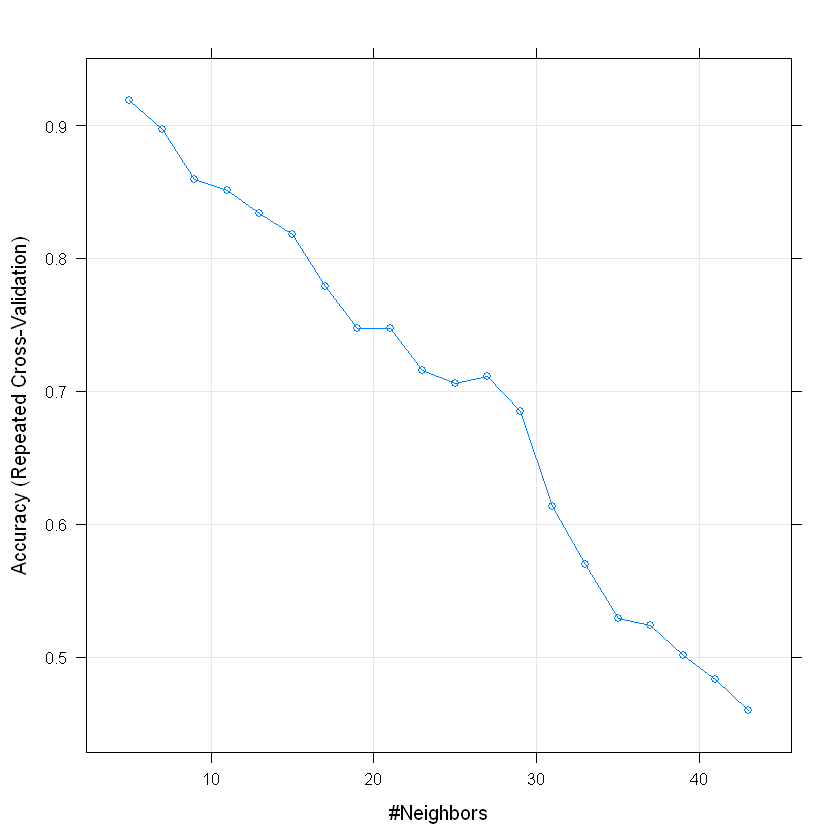

In [9]:
plot(fit)

In [10]:
varImp(fit)

ROC curve variable importance

  variables are sorted by maximum importance across the classes
              X1     X2      X3      X4      X5      X6      X7
milk     100.000 100.00 100.000 100.000 100.000 100.000 100.000
breathes  20.000 100.00   0.000   0.000  75.000  20.000 100.000
hair     100.000 100.00 100.000 100.000 100.000 100.000 100.000
backbone   0.000   0.00   0.000 100.000 100.000   0.000   0.000
feathers 100.000 100.00 100.000 100.000 100.000 100.000   0.000
legs      70.370  96.30  70.370 100.000  70.370  70.370  96.296
toothed   96.296  96.30  96.296  96.296  96.296  96.296  16.296
eggs      96.296  96.30  96.296  96.296  96.296  96.296  96.296
fins       7.407  92.59   7.407   7.407   7.407   7.407  92.593
aquatic    8.262  85.19  85.185  14.815  47.685   8.262  85.185
tail      18.519  18.52  81.481  81.481  81.481  18.519  18.519
airborne  69.516  69.52  69.516  75.926  69.516  76.923   7.407
catsize   54.074  51.00  74.074  74.074  61.574  50.997  54.074
venomous 

In [11]:
pred <- predict(fit, newdata = test )
confusionMatrix(pred, test$type)

Confusion Matrix and Statistics

          Reference
Prediction  1  2  3  4  5  6  7
         1 12  0  0  0  0  0  0
         2  0  7  0  0  0  0  0
         3  0  0  0  0  0  0  0
         4  2  0  0  2  1  0  0
         5  0  0  0  0  1  0  0
         6  0  0  0  0  0  2  0
         7  0  0  0  0  0  0  2

Overall Statistics
                                          
               Accuracy : 0.8966          
                 95% CI : (0.7265, 0.9781)
    No Information Rate : 0.4828          
    P-Value [Acc > NIR] : 3.361e-06       
                                          
                  Kappa : 0.856           
                                          
 Mcnemar's Test P-Value : NA              

Statistics by Class:

                     Class: 1 Class: 2 Class: 3 Class: 4 Class: 5 Class: 6
Sensitivity            0.8571   1.0000       NA  1.00000  0.50000  1.00000
Specificity            1.0000   1.0000        1  0.88889  1.00000  1.00000
Pos Pred Value         1.0000   1.00

In [12]:
# 89.66 % is accuracy